## Step 1: Importing the necessary Libraries

In [143]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step 2: Import Dataset

In [144]:
# The "application_data.csv" is name as "df"

df = pd.read_csv("application_data.csv")

inp0 = pd.read_csv("previous_application.csv")

pd.set_option('display.max_rows', None)

In [145]:
#Checking the dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Checking the Structure of the Data

In [147]:
#Checking the columns of the dataset

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [148]:
inp0.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [149]:
#Shape of the data

df.shape

(307511, 122)

In [150]:
inp0.shape

(1352240, 37)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [152]:
inp0.shape

(1352240, 37)

In [153]:
#Looking at the statistical data

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [154]:
inp0.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.352240e+06,1.352240e+06,1.051945e+06,1.352240e+06,1.352239e+06,6.304970e+05,1.041462e+06,1.352240e+06,1.352240e+06,630497.000000,...,4822.000000,1.352240e+06,1.352239e+06,1.051947e+06,809475.000000,809475.000000,809475.000000,809475.000000,809475.000000,809475.000000
mean,1.922528e+06,2.783327e+05,1.589973e+04,1.744971e+05,1.952638e+05,6.709289e+03,2.265945e+05,1.248578e+01,9.964304e-01,0.079644,...,0.774197,-8.825833e+02,3.150257e+02,1.600608e+01,342317.201571,13793.644472,33635.715743,76486.899293,81905.053949,0.331505
std,5.326946e+05,1.028328e+05,1.474686e+04,2.917547e+05,3.175297e+05,2.122454e+04,3.142208e+05,3.333614e+00,5.963969e-02,0.107821,...,0.101016,7.798983e+02,7.088936e+03,1.452154e+01,88722.574541,72370.109120,106675.076944,149580.651830,153247.109624,0.470754
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460754e+06,1.893218e+05,6.300000e+03,1.890000e+04,2.427750e+04,0.000000e+00,5.060250e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.305000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1245.000000,-1317.000000,-1272.000000,0.000000
50%,1.922989e+06,2.786465e+05,1.125000e+04,7.087500e+04,8.028000e+04,1.651500e+03,1.115415e+05,1.200000e+01,1.000000e+00,0.051861,...,0.835095,-5.830000e+02,4.000000e+00,1.200000e+01,365243.000000,-830.000000,-361.000000,-538.000000,-499.000000,0.000000
75%,2.383725e+06,3.675560e+05,2.054254e+04,1.800000e+05,2.156400e+05,7.740000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.810000e+02,8.500000e+01,2.400000e+01,365243.000000,-411.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Step 4: Data Quality Check and Sanity Check

In [155]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [156]:
inp0.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     300295
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                721743
AMT_GOODS_PRICE                 310778
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               721743
RATE_INTEREST_PRIMARY          1347418
RATE_INTEREST_PRIVILEGED       1347418
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 663885
NAME_CLIENT_TYPE                     1
NAME_GOODS_CATEGORY                  1
NAME_PORTFOLIO                       1
NAME_PRODUCT_TYPE                    1
CHANNEL_TYPE             

In [157]:
df.isnull().sum()/307511*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [158]:
inp0.isnull().sum()/1670214*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    17.979433
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               43.212606
AMT_GOODS_PRICE                18.607077
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              43.212606
RATE_INTEREST_PRIMARY          80.673375
RATE_INTEREST_PRIVILEGED       80.673375
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                39.748499
NAME_CLIENT_TYPE                0.000060
NAME_GOODS_CATEGORY             0.000060
NAME_PORTFOLIO                  0.000060
NAME_PRODUCT_TYP

The following columns have more than 50% Null values in "application_data.csv":

OWN_CAR_AGE, EXT_SOURCE_1, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BUILD_MEDI,  COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE

In [159]:
df1 = df.drop(["OWN_CAR_AGE", "EXT_SOURCE_1", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"], axis=1)

In [160]:
df1.shape

(307511, 82)

The following columns have more than 50% Null values in "previous_application.csv":

AMT_DOWN_PAYMENT, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED

In [161]:
inp1 = inp0.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [162]:
inp1.shape

(1352240, 33)

The following columns have less that 13% Null values:

AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE

**Suggestion to treat the Null Values of AMT_ANNUITY**:

After inspecting we see that the column AMT_ANNUITY contains float values. The mean of AMT_ANNUITY is 27108.573909 and the median is 24903.000000. It is better to replace all the value with median of the column as the column is less affected by outliars.

In [163]:
# AMT_ANNUITY is theLoan Annuity

df1.AMT_ANNUITY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_ANNUITY
Non-Null Count   Dtype  
--------------   -----  
307499 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [164]:
df1.AMT_ANNUITY.isnull().sum()

12

In [165]:
df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [166]:
df1[(df1.AMT_ANNUITY.isnull())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


**Suggestion to treat the Null Values of AMT_GOODS_PRICE column:**

After inspecting the column, we are not able to see any pattern in the missing values. The median of the column is 450000 and the mean is 538396.2. The missing values are to be replaced with median of the column.[link text](https://)

In [167]:
# AMT_GOODS_PRICE is the price of the goods for which the loan is given

df1.AMT_GOODS_PRICE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_GOODS_PRICE
Non-Null Count   Dtype  
--------------   -----  
307233 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [168]:
df1.AMT_GOODS_PRICE.isnull().sum()

278

In [169]:
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [170]:
df1[df1.AMT_GOODS_PRICE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
10819,112595,0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11287,113148,0,Revolving loans,F,N,Y,4,225000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
13008,115162,0,Revolving loans,F,N,Y,1,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


**Suggestion to treat the Null Values of NAME_TYPE_SUITE:**

The data type of the values of the column is string or object. We see that this is a categorical and unordered data. It is suitable to replace the Null values with mode. Here the mode is "Unaccompanied".

In [171]:
# NAME_TYPE_SUITE is Who was accompanying client when he was applying for the loan

df1.NAME_TYPE_SUITE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: NAME_TYPE_SUITE
Non-Null Count   Dtype 
--------------   ----- 
306219 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [172]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [173]:
df1.NAME_TYPE_SUITE.isnull().sum()

1292

In [174]:
df1[df1.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
2271,102661,0,Cash loans,F,N,N,0,225000.0,1890000.0,49986.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2625,103065,0,Cash loans,F,N,Y,1,112500.0,593010.0,16434.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2650,103093,0,Cash loans,M,Y,N,0,360000.0,728460.0,37134.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3012,103519,0,Cash loans,F,Y,N,0,135000.0,675000.0,17806.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3050,103560,0,Cash loans,F,N,N,2,225000.0,1506816.0,45814.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Suggestion to treat the Null Values of OBS_30_CNT_SOCIAL_CIRCLE:**

The datatype of the values of this column is float. As we can see this is an ordered kdata. After looking at the data, we can see that it has some outliers too. We should first get rid of the outliers and then we should replace the null values with the median of the column.

In [175]:
# OBS_30_CNT_SOCIAL_CIRCLE is How many observation of client's social surroundings with observable 30 DPD (days past due) default

df1.OBS_30_CNT_SOCIAL_CIRCLE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OBS_30_CNT_SOCIAL_CIRCLE
Non-Null Count   Dtype  
--------------   -----  
306490 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [176]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [177]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [178]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

**Suggestion to treat the Null Values of DEF_30_CNT_SOCIAL_CIRCLE:**

After inspecting the column, we see that the column contains ordered data, and it consists of outliers. Again for this case, we will first identify and drop the outliers first and then we will replace the null values with the median of the modified data.

In [179]:
# DEF_30_CNT_SOCIAL_CIRCLE is How many observation of client's social surroundings defaulted on 30 DPD (days past due)

df1.DEF_30_CNT_SOCIAL_CIRCLE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DEF_30_CNT_SOCIAL_CIRCLE
Non-Null Count   Dtype  
--------------   -----  
306490 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [180]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [181]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [182]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [183]:
inp0.isnull().sum()/1670214*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    17.979433
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               43.212606
AMT_GOODS_PRICE                18.607077
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              43.212606
RATE_INTEREST_PRIMARY          80.673375
RATE_INTEREST_PRIVILEGED       80.673375
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                39.748499
NAME_CLIENT_TYPE                0.000060
NAME_GOODS_CATEGORY             0.000060
NAME_PORTFOLIO                  0.000060
NAME_PRODUCT_TYP

#### Sanity Check of different Columns:

In [184]:
# Checking Datatypes of the columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [185]:
# Sanity check for the values of the column DAYS_BIRTH

df1.DAYS_BIRTH.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DAYS_BIRTH
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [186]:
df1.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [187]:
# Some values are negative, so we need to update the values

df1.DAYS_BIRTH = df1.DAYS_BIRTH.abs()

In [188]:
df1.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [189]:
# Sanity check for the values of the column DAYS_EMPLOYED

df1.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [190]:
# Some values are negative, so we need to update the values

df1.DAYS_EMPLOYED = df1.DAYS_EMPLOYED.abs()

In [191]:
df1.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [192]:
# Sanity check for the values of the column DAYS_REGISTRATION

df1.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [193]:
# Some values are negative, so we need to update the values

df1.DAYS_REGISTRATION = df1.DAYS_REGISTRATION.abs()

In [194]:
df1.DAYS_REGISTRATION.describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [195]:
# Sanity check for the values of the column DAYS_ID_PUBLISH

df1.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [196]:
# Some values are negative, so we need to update the values

df1.DAYS_ID_PUBLISH = df1.DAYS_ID_PUBLISH.abs()

In [197]:
df1.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Outliers Treatment:

In [198]:
#Looking at the outliers of the column AMT_ANNUITY

df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [199]:
# IQR of AMT_ANNUITY

34596.000000 - 16524.000000

18072.0

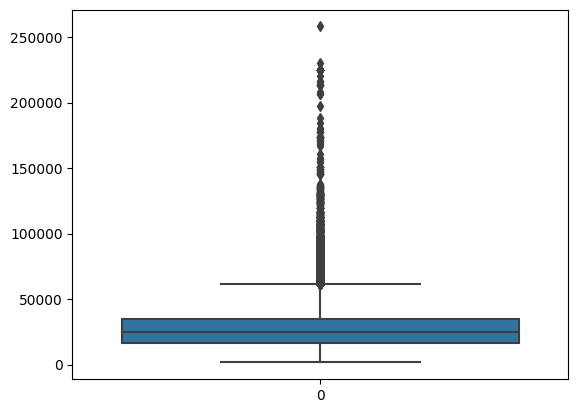

In [200]:
sns.boxplot(df1.AMT_ANNUITY)
plt.show()

**Suggestion for outlier treatment in AMT_ANNUITY column:**

As this column shows the annuity, the outliers are normal cnsidring people can take loans for great amount. so Outier treatment is not required in this case

In [201]:
# Looking at the outliers of the column CNT_CHILDREN

df1.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [202]:
# The IQR of CNT_CHILDREN

1

1

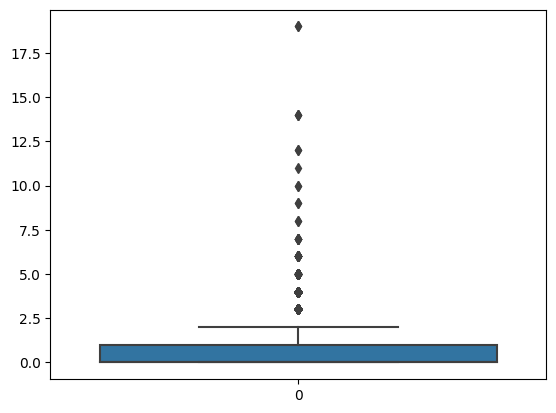

In [203]:
sns.boxplot(df1.CNT_CHILDREN)
plt.show()

**Suggestion for outlier treatment in CNT_CHILDREN:**

As we see the column contains some high vaues, it may be my mistake. So we will remove values higher than 5 to make our calculation easier.

In [204]:
# Looking at the outliers of the column DAYS_EMPLOYED

df1.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

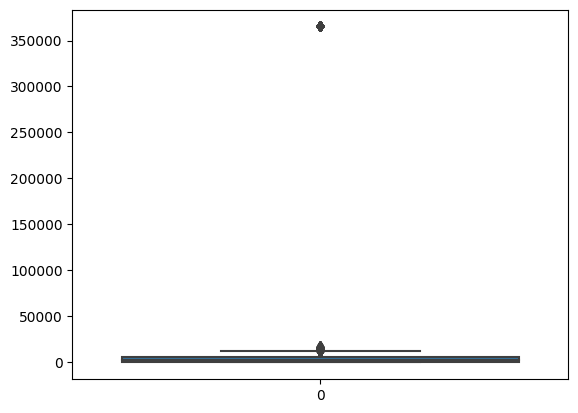

In [205]:
sns.boxplot(df1.DAYS_EMPLOYED)
plt.show()

**Suggestion for outlier treatment in DAYS_EMPLOYED:**

We can see from the plot that the column contains very few outliers. We can easily eliminate them from our data to make calculations and Data Analysis easier.

In [206]:
#  Looking at the outliers of the column AMT_INCOME_TOTAL

df1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

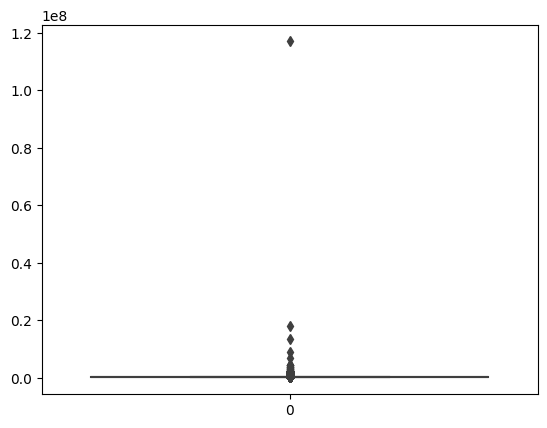

In [207]:
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.show()

**Suggestion for outlier treatment in AMT_INCOME_TOTAL:**

The IQR of AMT_INCOME_TOTAL is veru small and we are not able to see the fences as the outliers are huge. We choose to eliminate the outliers here as very few of the people applying here has income so high.

In [208]:
#  Looking at the outliers of the column DEF_30_CNT_SOCIAL_CIRCLE

df1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

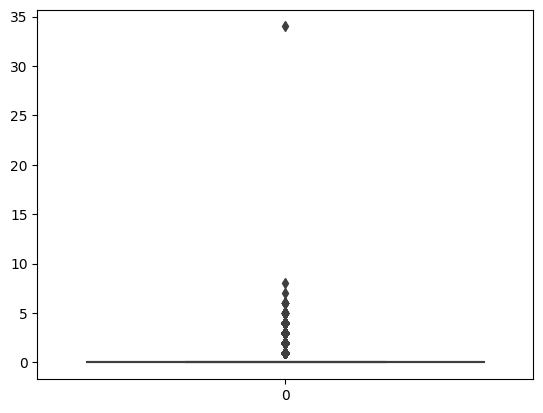

In [209]:
sns.boxplot(df1.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

**Suggestion for outlier treatment in DEF_30_CNT_SOCIAL_CIRCLE:**

The column contains a lot of outliers. We will positively remove all the outliers as we do not want to see people whose contacts have a lot of defaulters as it is risky to provide them with loans.

In [210]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352240 entries, 0 to 1352239
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1352240 non-null  int64  
 1   SK_ID_CURR                   1352240 non-null  int64  
 2   NAME_CONTRACT_TYPE           1352240 non-null  object 
 3   AMT_ANNUITY                  1051945 non-null  float64
 4   AMT_APPLICATION              1352240 non-null  float64
 5   AMT_CREDIT                   1352239 non-null  float64
 6   AMT_GOODS_PRICE              1041462 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1352240 non-null  object 
 8   HOUR_APPR_PROCESS_START      1352240 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1352240 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1352240 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1352240 non-null  object 
 12  NAME_CONTRACT_STATUS         1352240 non-n

In [211]:
inp1.DAYS_DECISION.describe()

count    1.352240e+06
mean    -8.825833e+02
std      7.798983e+02
min     -2.922000e+03
25%     -1.305000e+03
50%     -5.830000e+02
75%     -2.810000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [212]:
inp1.DAYS_DECISION = inp1.DAYS_DECISION.abs()

In [213]:
inp1.DAYS_DECISION.describe()

count    1.352240e+06
mean     8.825833e+02
std      7.798983e+02
min      1.000000e+00
25%      2.810000e+02
50%      5.830000e+02
75%      1.305000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

#### Binning

In [214]:
# Binning the DAYS_BIRTH column

df1["YEAR_BIRTH"] = df1["DAYS_BIRTH"]/365

In [215]:
df1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822


In [216]:
df1.YEAR_BIRTH = df1.YEAR_BIRTH.abs()

In [217]:
df1.YEAR_BIRTH.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEAR_BIRTH, dtype: float64

In [218]:
df1["YEAR_BIRTH_CATEGORY"] = pd.qcut(df1["YEAR_BIRTH"], q = [0, 0.2, 0.4, 0.6, 0.8], labels = ["Young", "Middle Age", "Older", "Retired"])

In [219]:
df1["YEAR_BIRTH_CATEGORY"].value_counts()

Young         61512
Older         61509
Middle Age    61504
Retired       61491
Name: YEAR_BIRTH_CATEGORY, dtype: int64

In [220]:
# Binning the column AMT_INCOME_TOTAL

df1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [221]:
df1["AMT_INCOME_TOTAL_CATEGORY"] = pd.qcut(df1["AMT_INCOME_TOTAL"], q = [0, 0.2, 0.4, 0.6, 0.8], labels = ["Low", "Medium", "High", "Very High"])

In [222]:
df1.AMT_INCOME_TOTAL_CATEGORY.value_counts()

Medium       85756
Very High    75513
Low          63671
High         35453
Name: AMT_INCOME_TOTAL_CATEGORY, dtype: int64

# Step 3: Analysis

In [223]:
df1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_BIRTH_CATEGORY,AMT_INCOME_TOTAL_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,Young,Very High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,Older,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,Retired,Low


In [224]:
df1.shape

(307511, 85)

## Data Imbalance Check

In [225]:
df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [226]:
df1.TARGET.value_counts()/307511*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Here, by the Data Imbalance Check, we see that 91.927% of the people are Non-Defaulter and 8.072% people are defaulters.

In target variable,

- 1: Defaulter
- 0: Non-Defaulter

## Spliting the data into Defaulter and Non-Defaulter

In [227]:
df1_TARGET_0 = df1[(df1["TARGET"] == 0)]

df1_TARGET_1 = df1[(df1["TARGET"] == 1)]

In [228]:
df1_TARGET_0.shape

(282686, 85)

In [229]:
df1_TARGET_0.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_BIRTH_CATEGORY,AMT_INCOME_TOTAL_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,Older,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,Retired,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,Retired,Medium


In [230]:
df1_TARGET_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_BIRTH_CATEGORY,AMT_INCOME_TOTAL_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,Young,Very High
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,Retired,Medium
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,Retired,Very High


## Univariate Analysis

#### Categorical Data

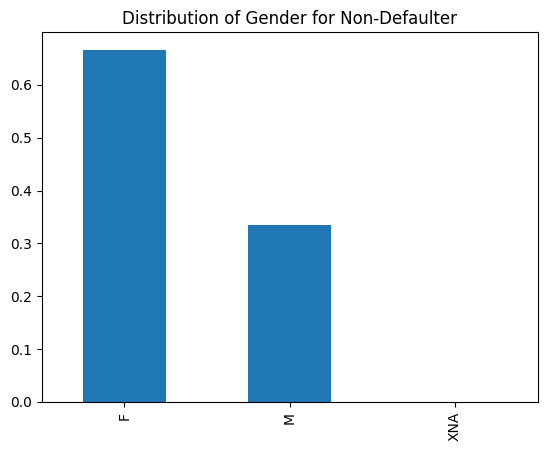

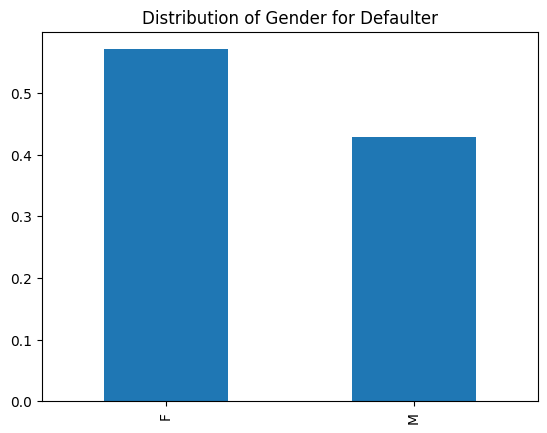

In [231]:
# Analysis of Gender

df1_TARGET_0.CODE_GENDER.value_counts(normalize =True).plot.bar()

plt.title("Distribution of Gender for Non-Defaulter")

plt.show()

df1_TARGET_1.CODE_GENDER.value_counts(normalize =True).plot.bar()

plt.title("Distribution of Gender for Defaulter")

plt.show()

**Inference:**

For Gender, we see that the Gender Gap for Non-Defaulers are higher compared to Defaulters. We can see for both of the cases, number of female are more thannumber of males

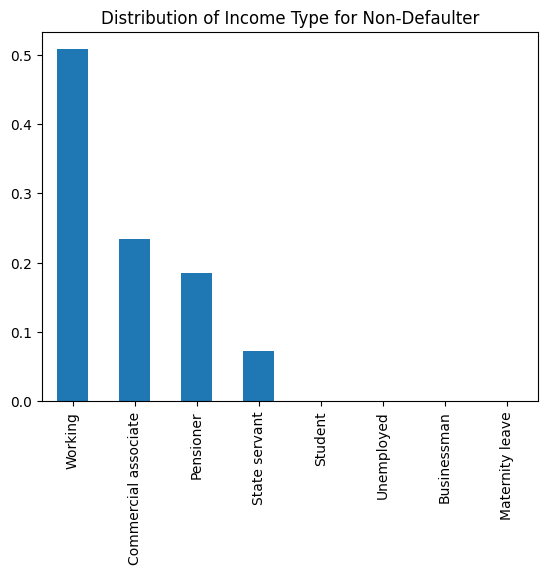

In [232]:
# #Analysis on NAME_INCOME_TYPE

df1_TARGET_0.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Income Type for Non-Defaulter")

plt.show()

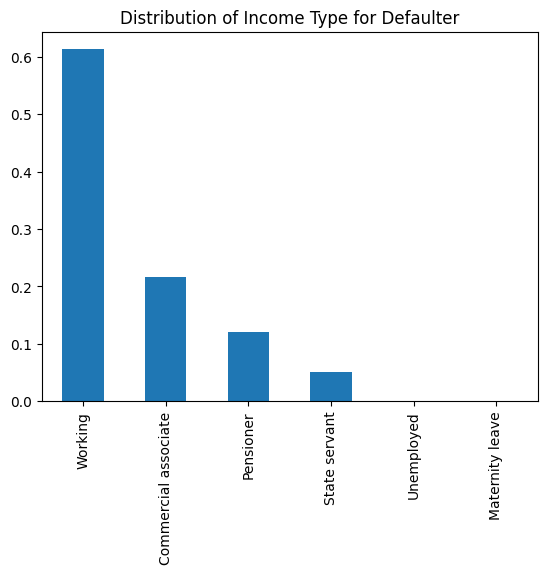

In [233]:
df1_TARGET_1.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Income Type for Defaulter")

plt.show()

**Inference:**

From the above plots, we see that in Defaulter group we have more percentage of Working Professionals than Non-Defaulters. In Non-Defaulters, we have more percentage of commercial Associates and Pensioners. So Working Professionals are more likely to Default than other Job Groups.

In [234]:
df1_TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize = True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

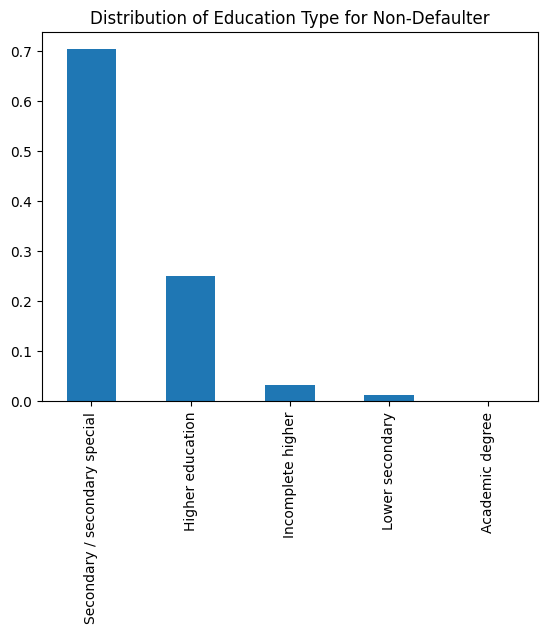

In [235]:
# Analysis on NAME_EDUCATION_TYPE

df1_TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Education Type for Non-Defaulter")

plt.show()

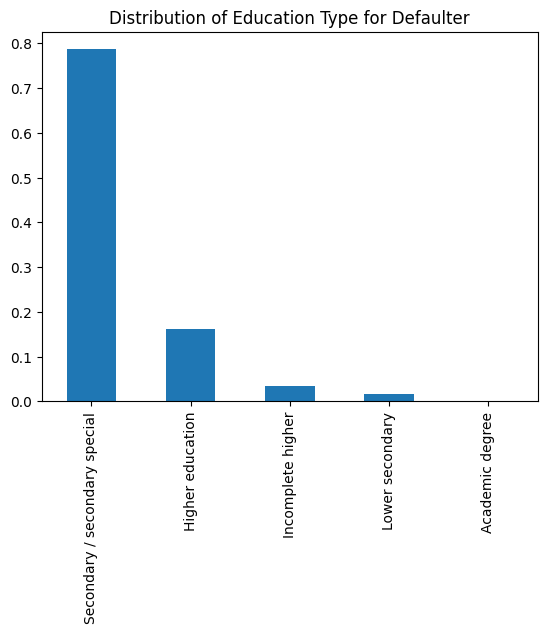

In [236]:
df1_TARGET_1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Education Type for Defaulter")

plt.show()

**Inference:**

From the above 2 plots, we can conclude that people with the "Secondary / secondary special" educational background are slightly more likely to Default than other education types.

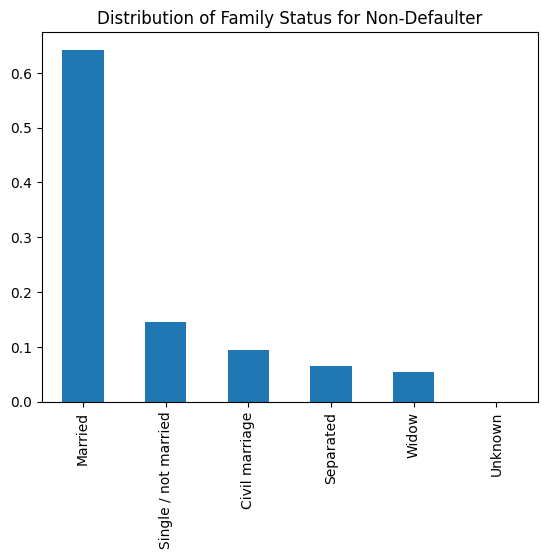

In [237]:
# Analysis on NAME_FAMILY_STATUS

df1_TARGET_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Family Status for Non-Defaulter")

plt.show()

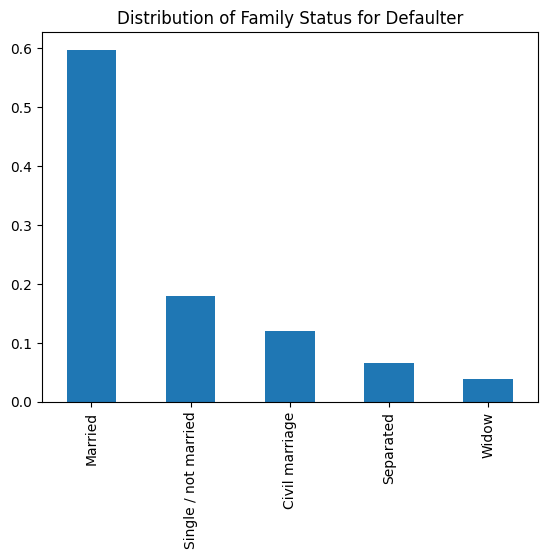

In [238]:
df1_TARGET_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Family Status for Defaulter")

plt.show()

**Inference:**

Here we can see that Married people are less likely to be Defaulters than Single/Not Married peoples.

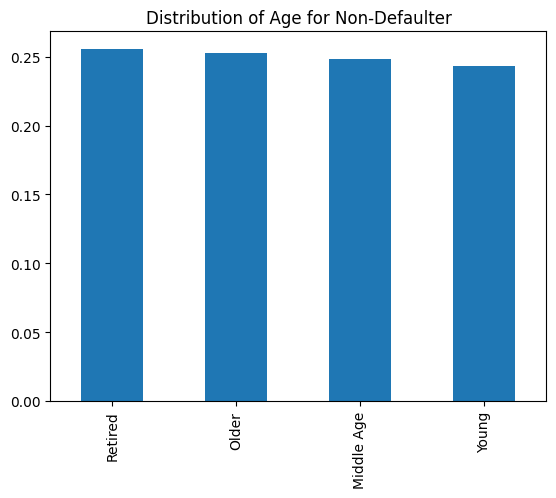

In [239]:
# Analysis on YEAR_BIRTH_CATEGORY

df1_TARGET_0.YEAR_BIRTH_CATEGORY.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Age for Non-Defaulter")

plt.show()

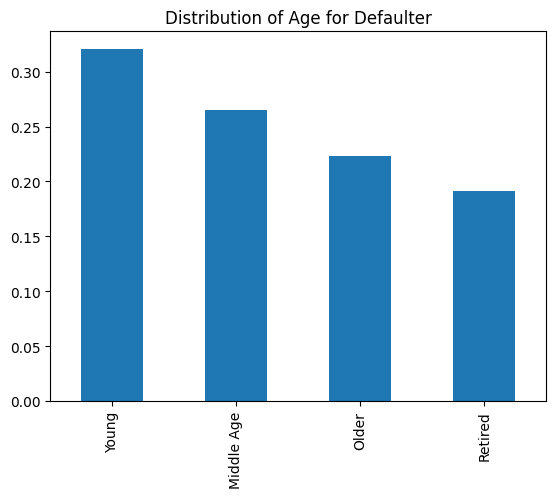

In [240]:
df1_TARGET_1.YEAR_BIRTH_CATEGORY.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Age for Defaulter")

plt.show()

**Inference:**

From the above plots, we can colclude, Young and Middle aged persons have more chance to default than Old and Retired persons. SO as age increases, the chance to be Non-Defaulters increases.

#### Numerical Data

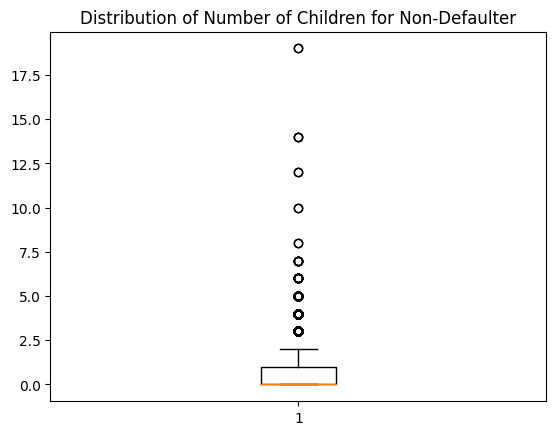

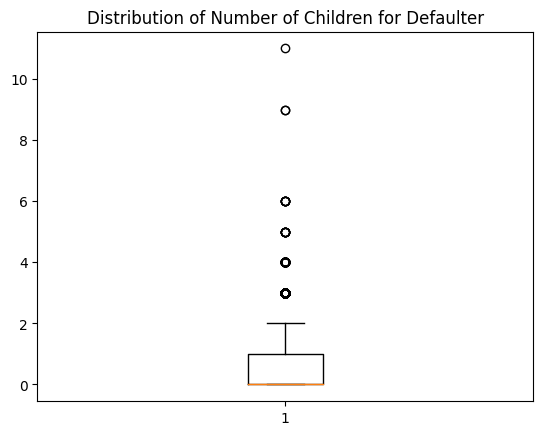

In [241]:
#Analysis on Number of Children

plt.boxplot(df1_TARGET_0.CNT_CHILDREN)

plt.title("Distribution of Number of Children for Non-Defaulter")

plt.show()

plt.boxplot(df1_TARGET_1.CNT_CHILDREN)

plt.title("Distribution of Number of Children for Defaulter")

plt.show()

**Inference:**

As we see in both of the box plots, the mean and median of number of children of both defaulters and Non-Defaulters are same. However usually Non-Defaulters may have higher number of children

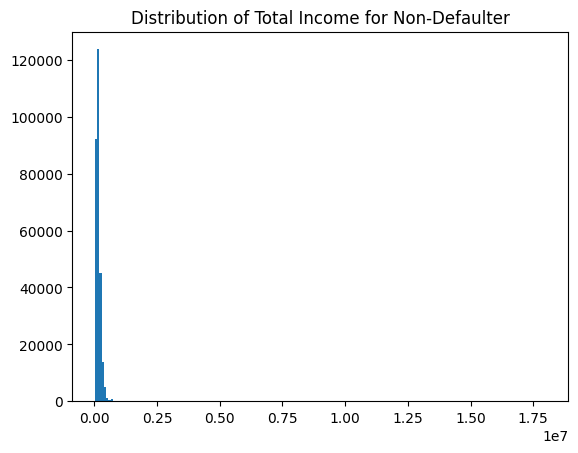

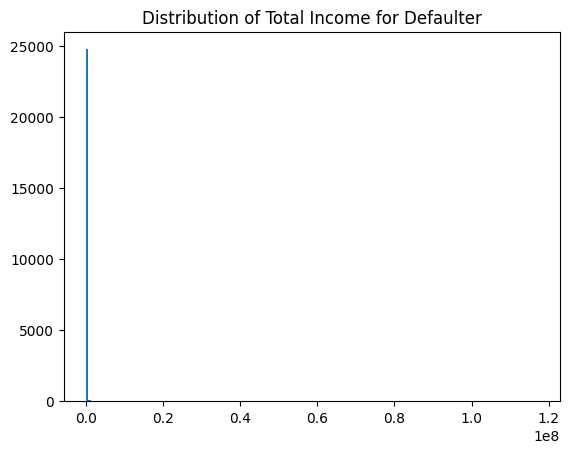

In [242]:
# Analysis on AMT_INCOME_TOTAL

plt.hist(df1_TARGET_0.AMT_INCOME_TOTAL, bins = 200)

plt.title("Distribution of Total Income for Non-Defaulter")

plt.show()

plt.hist(df1_TARGET_1.AMT_INCOME_TOTAL, bins = 200)

plt.title("Distribution of Total Income for Defaulter")

plt.show()

**Inference:**

From the above plots, we can easily conclude: Higher the income, lower the chance to Default.

## Bi-Variate Analysis

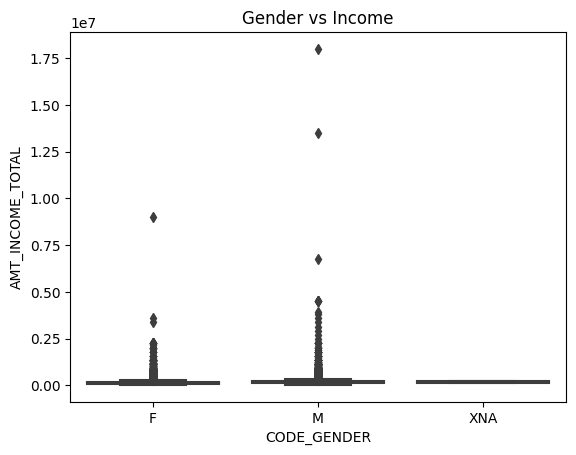

In [243]:
# Gender vs Total Income

sns.boxplot(df1_TARGET_0, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Income")

plt.show()

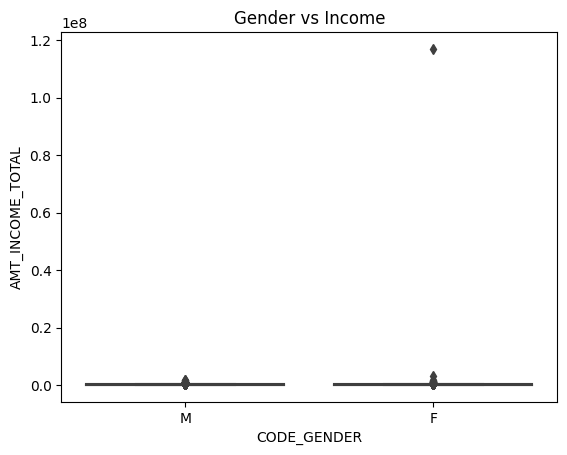

In [244]:
sns.boxplot(df1_TARGET_1, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Income")

plt.show()

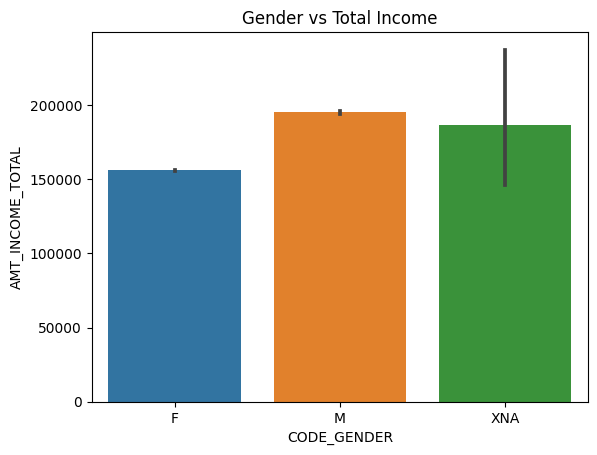

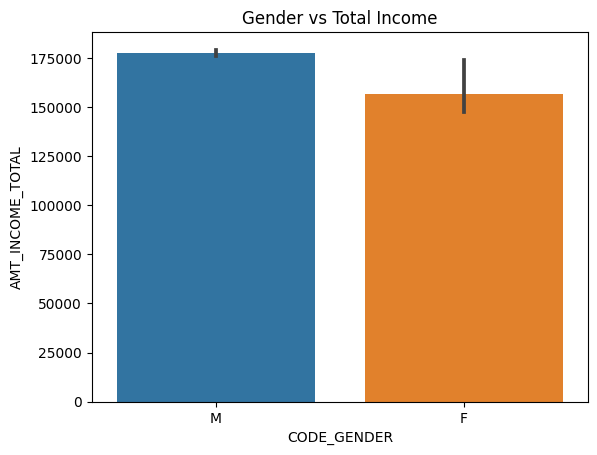

In [245]:
# Gender vs Total Income

sns.barplot(df1_TARGET_0, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Total Income")

plt.show()

sns.barplot(df1_TARGET_1, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Total Income")

plt.show()

**Inference:**

From the above box plot we can understand people who default have low income compared to Non-Defaulter irrespective of the gender.

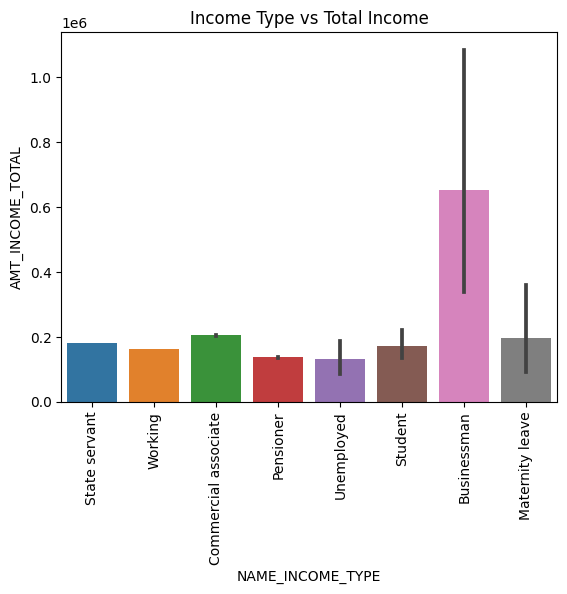

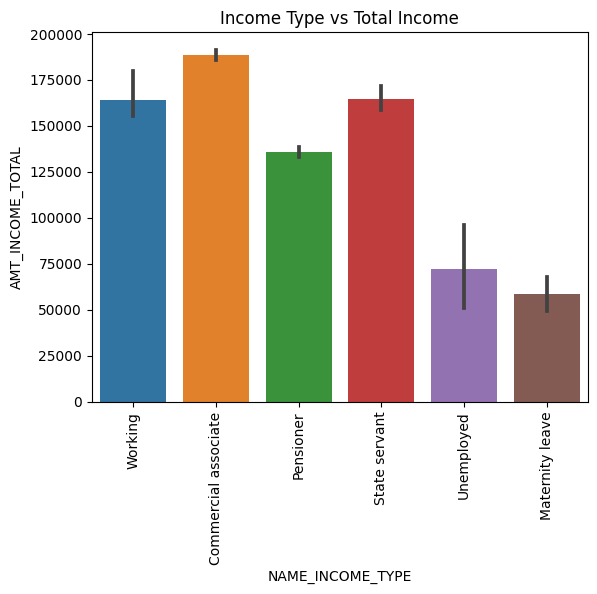

In [345]:
sns.barplot(df1_TARGET_0, x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL")

plt.title("Income Type vs Total Income")

plt.xticks(rotation = 90)

plt.show()

sns.barplot(df1_TARGET_1, x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL")

plt.title("Income Type vs Total Income")

plt.xticks(rotation = 90)


plt.show()

**Inference:**

Businessman with high income are very less likely to default than any other type of Income group

In [247]:
# Analysis of the correlation between Income, Amount of Credit, Annuity, Age, Days Employed

res0 = df1_TARGET_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "DAYS_BIRTH", "DAYS_EMPLOYED"]].corr()

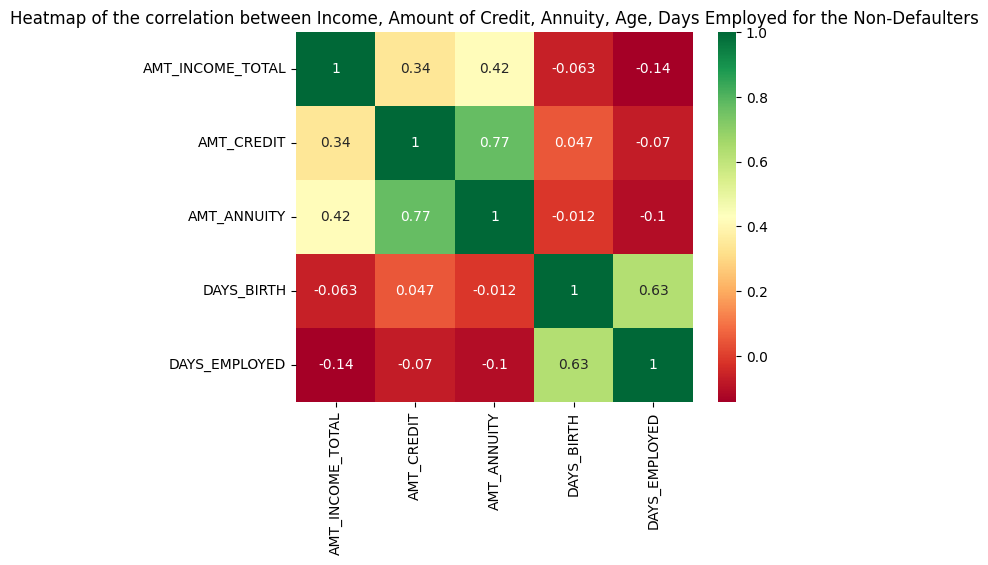

In [347]:
sns.heatmap(res0, annot = True, cmap = "RdYlGn")

plt.title("Heatmap of the correlation between Income, Amount of Credit, Annuity, Age, Days Employed for the Non-Defaulters")

plt.show()

In [249]:
res1 = df1_TARGET_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "DAYS_BIRTH", "DAYS_EMPLOYED"]].corr()

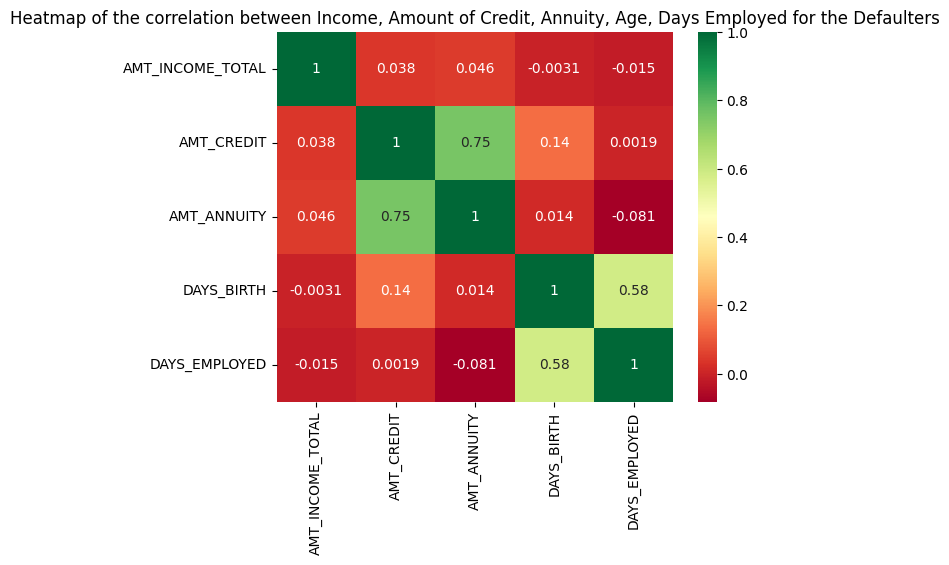

In [348]:
sns.heatmap(res1, annot = True, cmap = "RdYlGn")

plt.title("Heatmap of the correlation between Income, Amount of Credit, Annuity, Age, Days Employed for the Defaulters")

plt.show()

**Inference:**

From the heatmaps, we can see for defaulters Age and Days of Employment is more are more correlated. So plople who are older and are working for a longer time are less likely to Default.

# Step 4: Merging DataSets

In [251]:
inp1.shape

(1352240, 33)

In [252]:
df1.shape

(307511, 85)

In [253]:
merged_df = pd.merge(df1, inp1, on = "SK_ID_CURR", how = "left")

In [254]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [255]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172728 entries, 0 to 1172727
Columns: 117 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(45), int64(41), object(29)
memory usage: 1.0+ GB


In [256]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=117)

In [257]:
merged_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 640296
XNA                                 456351
Repairs                              16174
Other                                10813
Urgent needs                          5913
Buying a used car                     1958
Building a house or an annex          1876
Everyday expenses                     1665
Medicine                              1524
Payments on other loans               1272
Education                             1088
Journey                                811
Purchase of electronic equipment       743
Buying a new car                       727
Wedding / gift / holiday               655
Buying a home                          582
Car repairs                            559
Furniture                              530
Buying a holiday home / land           375
Business development                   288
Gasification / water supply            209
Buying a garage                         93
Hobby                                   37
Money for a

In [258]:
merged_df = merged_df[-(merged_df["NAME_CASH_LOAN_PURPOSE"] == "XAP")]

In [259]:
merged_df = merged_df[-(merged_df["NAME_CASH_LOAN_PURPOSE"] == "XNA")]

In [283]:
merged_df.CODE_GENDER.value_counts()

F      48654
M      27426
XNA        1
Name: CODE_GENDER, dtype: int64

In [284]:
merged_df = merged_df[-(merged_df["CODE_GENDER"] == "XNA")]

In [285]:
merged_df_TARGET_0 = merged_df[(merged_df["TARGET"] == 0)]

merged_df_TARGET_1 = merged_df[(merged_df["TARGET"] == 1)]

In [286]:
merged_df_TARGET_0.shape

(67876, 117)

In [287]:
merged_df_TARGET_1.shape


(8204, 117)

In [288]:
pd.set_option('display.max_rows', None)

## Data Imbalance

In [289]:
merged_df.TARGET.value_counts(normalize = True)

0    0.892166
1    0.107834
Name: TARGET, dtype: float64

<Axes: >

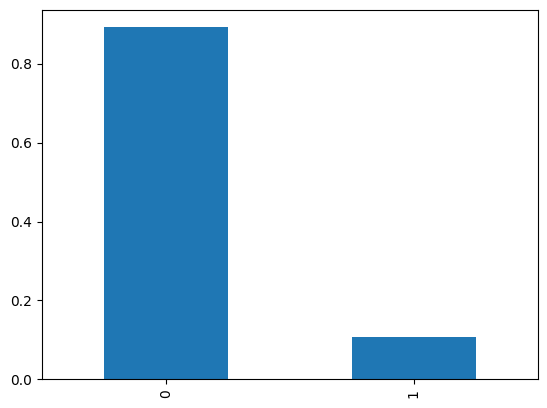

In [290]:
merged_df.TARGET.value_counts(normalize = True).plot.bar()

In [291]:
merged_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_x                0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_x                        0
AMT_ANNUITY_x                       5
AMT_GOODS_PRICE_x                  71
NAME_TYPE_SUITE_x                 704
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

## Univariate Analysis

#### Categorical Data

In [329]:
merged_df_TARGET_0.YEAR_BIRTH_CATEGORY.value_counts()

Retired       14180
Young         13762
Middle Age    13739
Older         13343
Name: YEAR_BIRTH_CATEGORY, dtype: int64

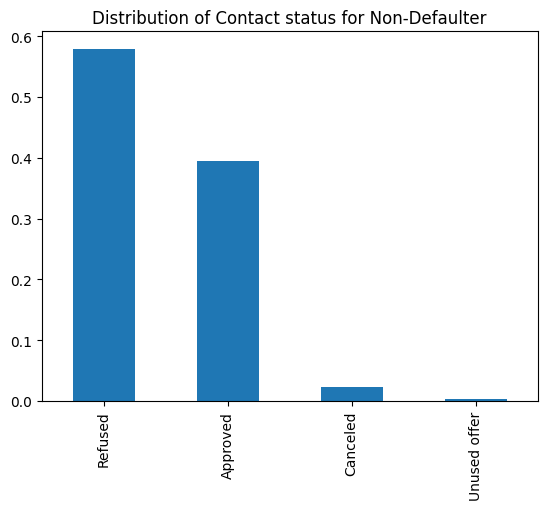

In [292]:
# Analysis of NAME_CONTRACT_STATUS

merged_df_TARGET_0.NAME_CONTRACT_STATUS.value_counts(normalize =True).plot.bar()

plt.title("Distribution of Contact status for Non-Defaulter")

plt.show()

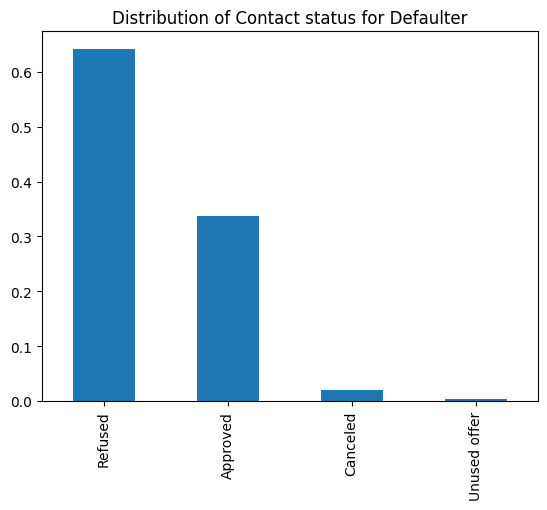

In [293]:
merged_df_TARGET_1.NAME_CONTRACT_STATUS.value_counts(normalize =True).plot.bar()

plt.title("Distribution of Contact status for Defaulter")

plt.show()

**Inference:**

From the above plots, we can see that if the previous application was approved, chances of the person being a Non-Defaulter becomes higher.

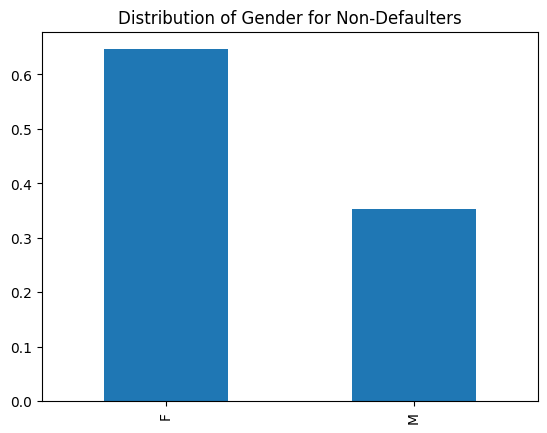

In [349]:
# Analysis on Gender

merged_df_TARGET_0.CODE_GENDER.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Gender for Non-Defaulters")

plt.show()

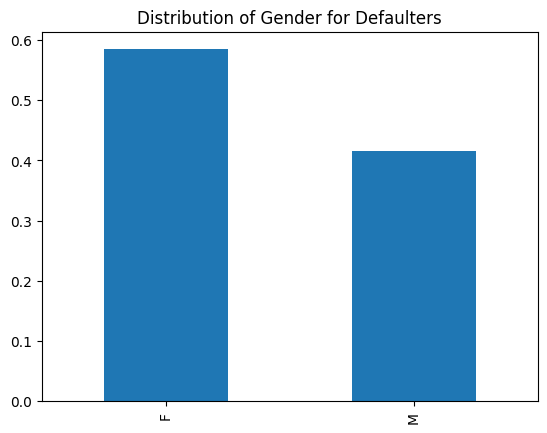

In [351]:
merged_df_TARGET_1.CODE_GENDER.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Gender for Defaulters")

plt.show()

**Inference:**

From the plots, it can be understood that females are more likely to be Non-Defaulter than men.

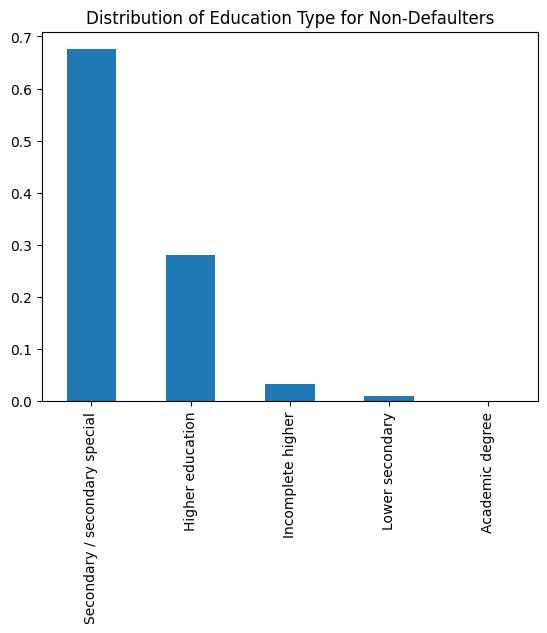

In [352]:
# Analysis on the Education Type

merged_df_TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Education Type for Non-Defaulters")

plt.show()

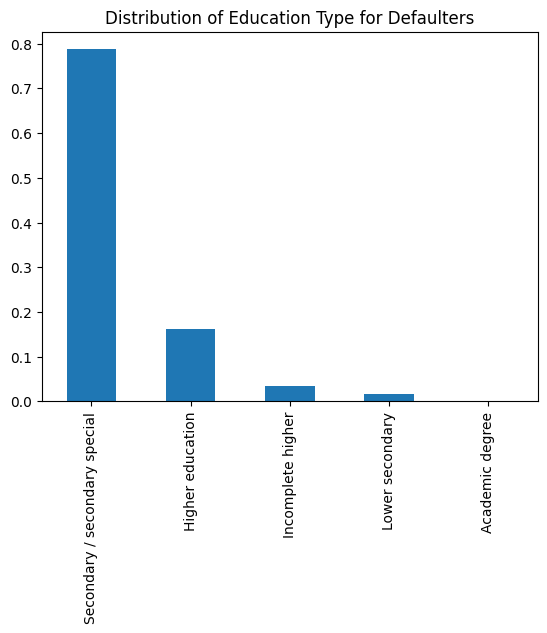

In [353]:
merged_df_TARGET_1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar()

plt.title("Distribution of Education Type for Defaulters")

plt.show()

**Inference::**

Persons with the education "Secondary / Secondaty special" are likely to Default more than other persons with dufferent educational backgrount.

#### Numerical Data

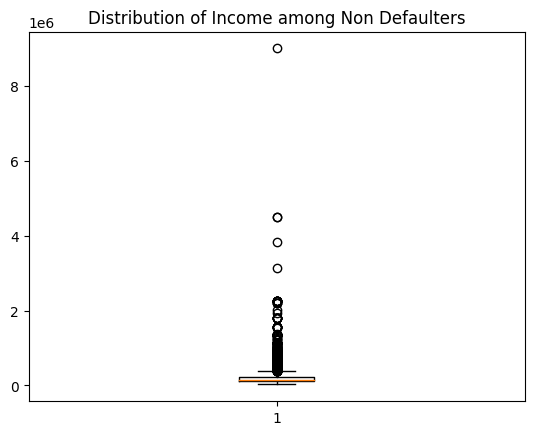

In [354]:
# Analysis on Total Income

plt.boxplot(merged_df_TARGET_0.AMT_INCOME_TOTAL)

plt.title("Distribution of Income among Non Defaulters")

plt.show()

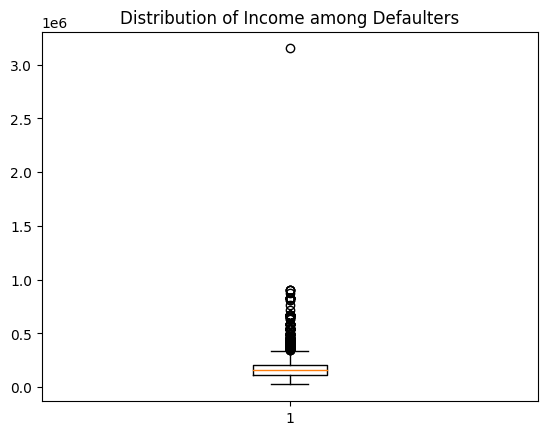

In [356]:
plt.boxplot(merged_df_TARGET_1.AMT_INCOME_TOTAL)

plt.title("Distribution of Income among Defaulters")

plt.show()

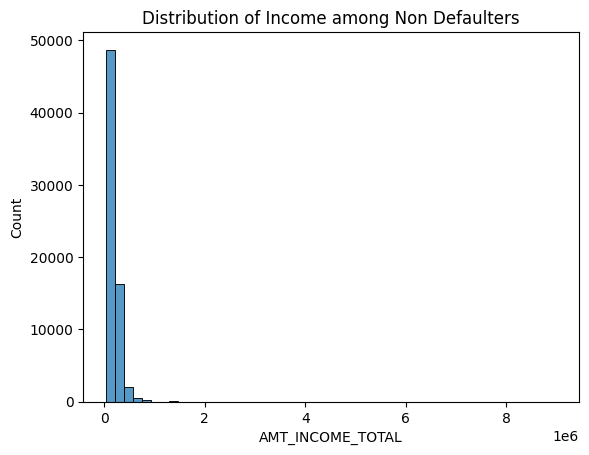

In [357]:
sns.histplot(merged_df_TARGET_0.AMT_INCOME_TOTAL, bins = 50)

plt.title("Distribution of Income among Non Defaulters")

plt.show()

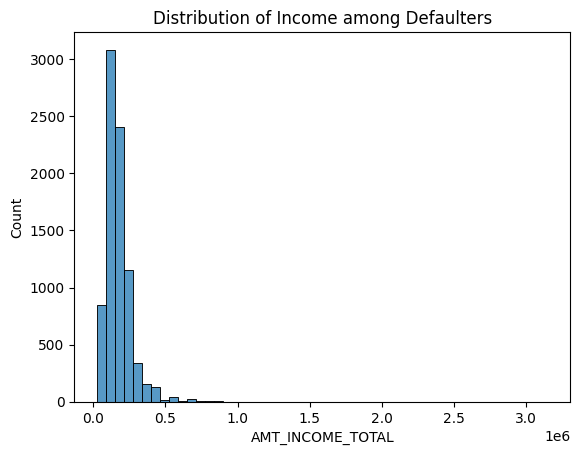

In [365]:
sns.histplot(merged_df_TARGET_1.AMT_INCOME_TOTAL, bins = 50)

plt.title("Distribution of Income among Defaulters")

plt.show()

**Inference:**

Pleple with higher income car way more likely to not Default for loans.

## Bi-variate Analysis

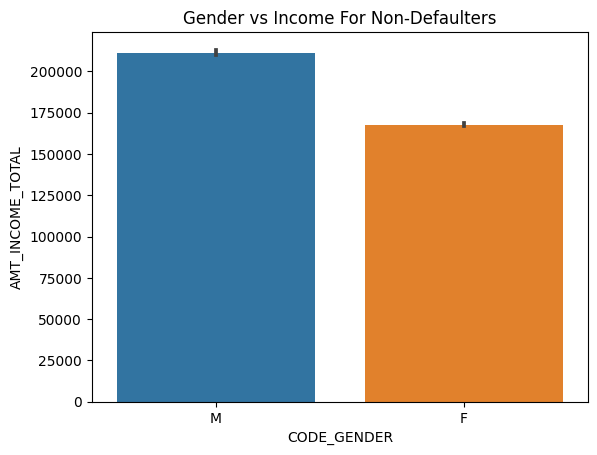

In [359]:
# Gender vs Income

sns.barplot(merged_df_TARGET_0, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Income For Non-Defaulters")

plt.show()

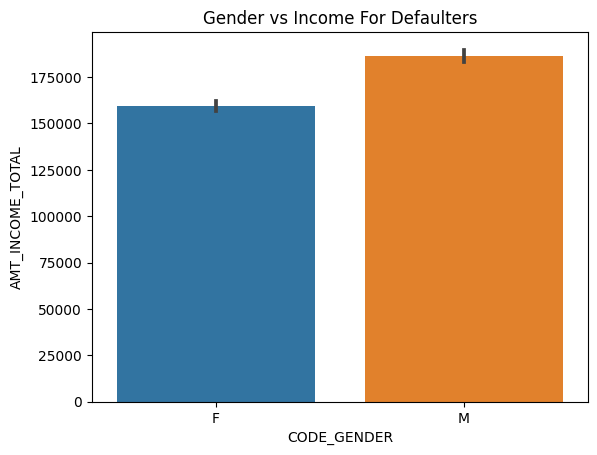

In [360]:
sns.barplot(merged_df_TARGET_1, x = "CODE_GENDER", y = "AMT_INCOME_TOTAL")

plt.title("Gender vs Income For Defaulters")

plt.show()

**Inference:**

Irrespective of gender, we see that people with higher income are less likely to default.

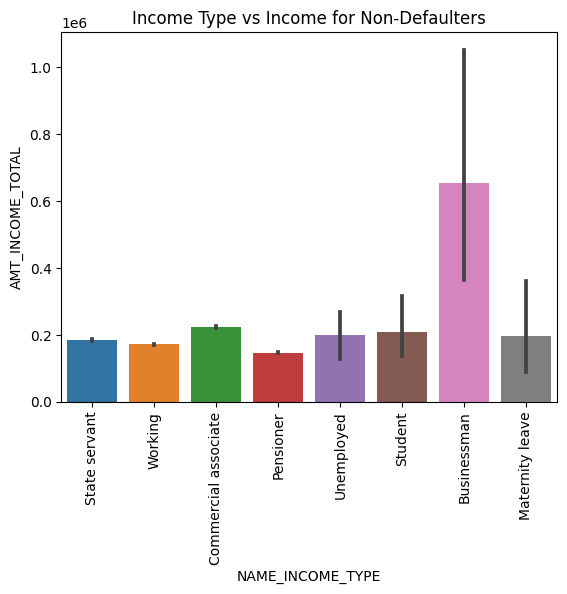

In [361]:
# Income vs. Income Type

sns.barplot(merged_df_TARGET_0, x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL")

plt.title("Income Type vs Income for Non-Defaulters")

plt.xticks(rotation = 90)

plt.show()

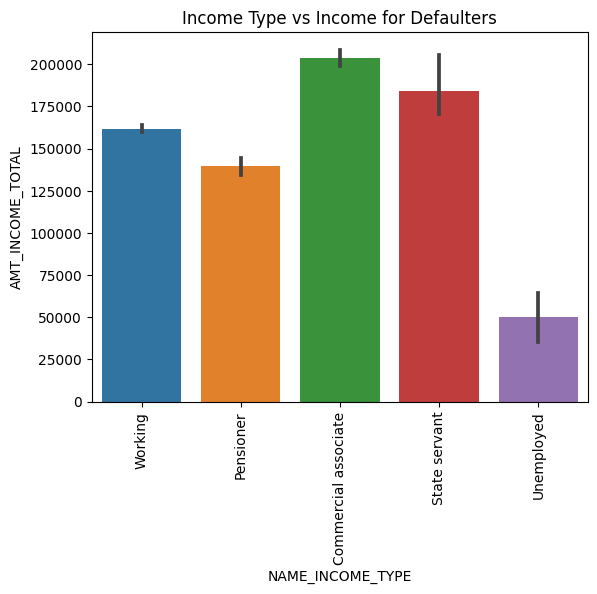

In [362]:
sns.barplot(merged_df_TARGET_1, x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL")

plt.title("Income Type vs Income for Defaulters")

plt.xticks(rotation = 90)

plt.show()

**Inference:**

Businessmen are very less likely to default for loan than any other profession.

In [332]:
# Analysing Correlation between Income, Annuity, Age

merged_df_TARGET_0[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "AMT_CREDIT_y"]].corr()

,AMT_INCOME_TOTAL,DAYS_BIRTH,OBS_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_CREDIT_y
AMT_INCOME_TOTAL,1.000000,-0.050992,-0.041343,0.385795,0.302692
DAYS_BIRTH,-0.050992,1.000000,0.000450,-0.070487,-0.081626
OBS_30_CNT_SOCIAL_CIRCLE,-0.041343,0.000450,1.000000,-0.011156,0.010825
AMT_ANNUITY_y,0.385795,-0.070487,-0.011156,1.000000,0.778521
AMT_CREDIT_y,0.302692,-0.081626,0.010825,0.778521,1.000000


In [333]:
merged_res_0 = merged_df_TARGET_0[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "AMT_CREDIT_y"]].corr()

In [334]:
merged_df_TARGET_1[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "AMT_CREDIT_y"]].corr()

,AMT_INCOME_TOTAL,DAYS_BIRTH,OBS_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY_y,AMT_CREDIT_y
AMT_INCOME_TOTAL,1.000000,0.026381,-0.002313,0.382584,0.301494
DAYS_BIRTH,0.026381,1.000000,-0.001370,-0.028370,-0.019100
OBS_30_CNT_SOCIAL_CIRCLE,-0.002313,-0.001370,1.000000,-0.000700,0.022852
AMT_ANNUITY_y,0.382584,-0.028370,-0.000700,1.000000,0.802236
AMT_CREDIT_y,0.301494,-0.019100,0.022852,0.802236,1.000000


In [335]:
merged_res_1 = merged_df_TARGET_1[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "AMT_CREDIT_y"]].corr()

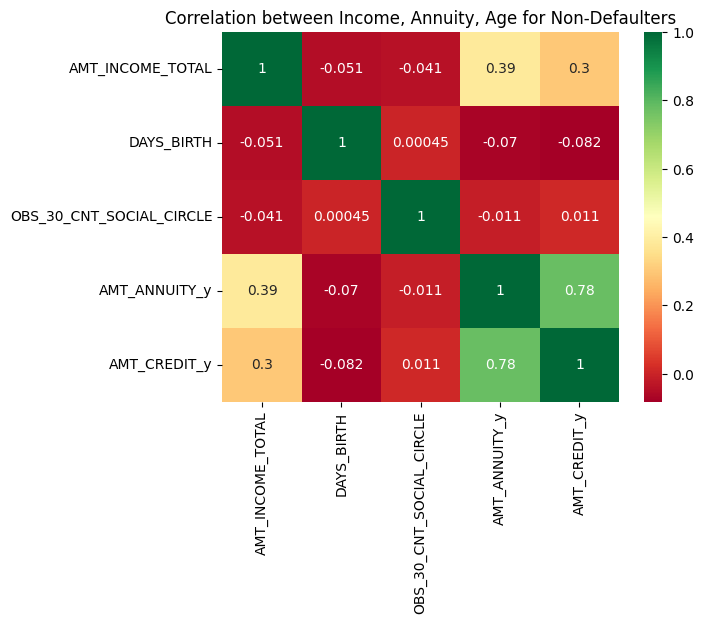

In [364]:
sns.heatmap(merged_res_0, annot = True, cmap = "RdYlGn")

plt.title("Correlation between Income, Annuity, Age for Non-Defaulters")

plt.show()

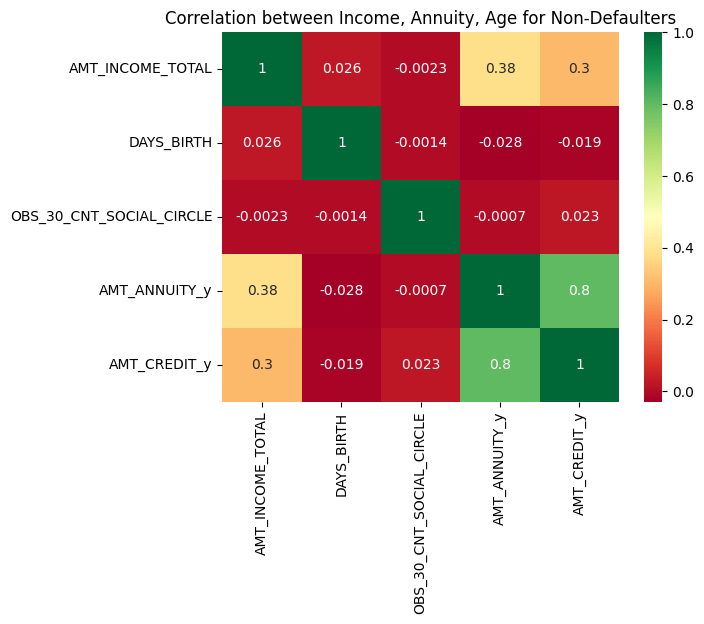

In [363]:
sns.heatmap(merged_res_1, annot = True, cmap = "RdYlGn")

plt.title("Correlation between Income, Annuity, Age for Non-Defaulters")

plt.show()

# Step 4: Conclusion

**Highly Recommended Groups (Probable Non Defaulters):**

1. Females are more Likely to be Non Defaulters than Men.

2. Married People are less likely to be defaulters than Non married or single people.

3. Old and retired (60+) people

4. People from Higher Income group

5. Businessmen are significantly less likely to Default than other professionals.

**High Risk Groups (Probable Defaulters):**

1. Working Professionals are more likely to be defaulters than other Job groups.

2. Persons with the "Secondary / secondary special" educational background are slightly more likely to Default than other education types

3. Young people compared to old and retired people.

4. Single people

5. Younger People